## Clustering and Dimensionality Reduction on the MNIST Dataset

### Step 0: Establish the Question

The Modified National Institute of Standards and Technology (MNIST) database is a popular dataset of handwritten digits. It is commonly used for training computer vision models to recognize naturalistic writing data and learn how to map the written digits to their numeric representations. Some samples of the dataset are shown below.

![MNIST](MNIST_dataset_example.png)

More information can be found on the database's [Wikipedia page.](https://en.wikipedia.org/wiki/MNIST_database)

Each image (sample) is a 28x28 matrix, where each element is a binary value 0 (black) or 1 (white). We are interested in building a model that can recognize the differences between the handwritten digits. Specifically we want to do this via __unsupervised clustering__, where the model learns separate representations based on the underlying distribution of binary values for all samples.

#### Check-in: What are the data features of our dataset? What are the labels?



### Step 1: Environment Setup

1. Make sure you update your local copy of the repository by running `git pull`
2. Check that the mnist.csv file is in the folder called data

In [2]:
# install the necessary libraries
%pip install pandas numpy matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# import the necessary libraries
import pandas as pd # data manipulation
import numpy as np # numerical operations and arrays
import matplotlib.pyplot as plt # plotting
from sklearn.model_selection import train_test_split # train-test split
# kmeans
from sklearn.cluster import KMeans # k-means clustering
# PCA
from sklearn.decomposition import PCA # Principal Component Analysis

### Step 2: Read and Clean Data

In [93]:
# Read in the dataset with pd.read_csv (save it in a variable called df)
# Data is in data/mnist_subsample.csv
df = pd.read_csv('../data/mnist_subsample.csv')

In [94]:
# Check for missing values using df.isnull().sum().sum()
df.isnull().sum().sum()

np.int64(0)

### Step 3: Data Exploration

Let's explore the dataset a little bit to get an idea of what we're working with.

In [95]:
# Print out the first 5 rows of the dataset with df.head()
print(df.head())

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      6    0    0    0    0    0    0    0    0    0  ...      0      0   
1      2    0    0    0    0    0    0    0    0    0  ...      0      0   
2      7    0    0    0    0    0    0    0    0    0  ...      0      0   
3      5    0    0    0    0    0    0    0    0    0  ...      0      0   
4      7    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [96]:
# Print the column names of the dataset with df.columns
df.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [97]:
# Print the shape of the dataset with df.shape
df.shape

(56000, 785)

#### Check-in: What do you notice about the shape? How many total samples are there? How many features are there per sample?

<Axes: xlabel='label'>

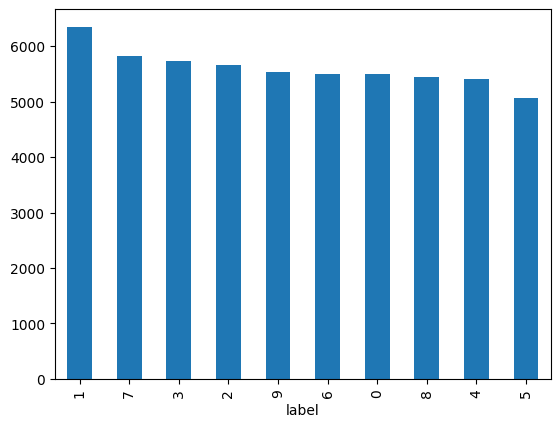

In [98]:
# Plot the distribution of the target variable (label)
# using df['label'].value_counts().plot(kind='bar')
df['label'].value_counts().plot(kind='bar')

7


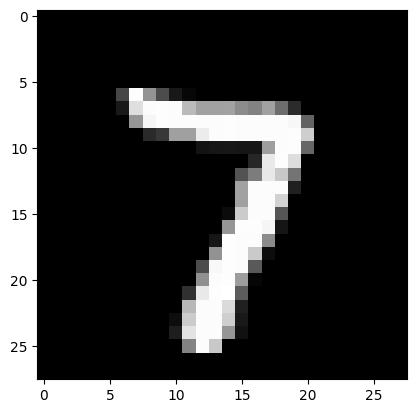

In [115]:
# Plot one of the images in the dataset

# Grab the nth image 
n = np.random.choice(df.shape[0])
image = df.iloc[n,1:].values

# Reshape it to 28x28 with image.reshape(28, 28)
image = image.reshape(28,28)

# Plot the image using plt.imshow(image, cmap='gray')
plt.imshow(image, cmap='gray')

# Print its label using print(df.iloc[n, 0])
print(df.iloc[n, 0])


Now that we have a good idea of what we're looking at, let's start doing some statistical learning!

### Step 4: Dimensionality Reduction with PCA

In [116]:
# Create X and y variables for clustering
# You can use df.drop('label', axis=1).values to get the features and df['label'].values to get the labels
X = df.drop('label', axis=1).values
y = df['label'].values

In [120]:
# Create PCA model, setting n_components to 20
pca = PCA(n_components=20)

In [121]:
# Fit model to the data using .fit() method (this learns the W matrix)
pca.fit(X)

,n_components,20
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [122]:
# Transform the data using .transform() method and save to a variable called X_reduced
X_reduced = pca.transform(X)

In [123]:
# Print the shape of the reduced dataset
X_reduced.shape

(56000, 20)

### Step 5: Clustering with K-Means

#### Check-in: Before we train our model, stop to think: what should we set the value k to?

In [124]:
# train a k-means model (mdl) with k clusters using the fit() method on the training data
k = 10
mdl = KMeans(n_clusters=k)
mdl.fit(X_reduced)

,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [125]:
# Now predict the clusters for the test set using the predict() method
# save the predictions in a variable called y_pred
y_pred = mdl.predict(X_reduced)

### Step 6: Visualize first two components

In [126]:
X_reduced.shape

(56000, 20)

In [130]:
# visualize the predicted clusters the first two PCA components
X_vis = X_reduced[:,:3]

In [131]:
X_vis.shape

(56000, 3)

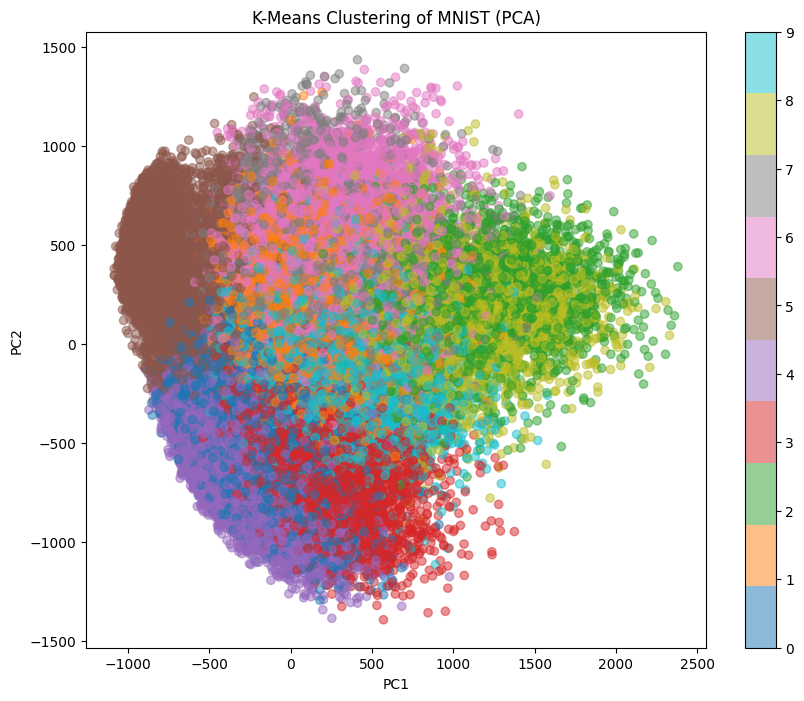

In [129]:
# Create a scatter plot of the first two PCA components colored by predicted cluster
plt.figure(figsize=(10, 8))

# You can use plt.scatter() for this
# Set c=y_pred to color by predicted cluster
# Use cmap='tab10' for distinct colors and alpha=0.5 for transparency
scatter = plt.scatter(X_vis[:,0],X_vis[:,1],c=y_pred, cmap='tab10', alpha=0.5)

# Add a colorbar with plt.colorbar() and set ticks to range(k)
plt.colorbar(scatter, ticks=range(k))

# Add title and axis labels with plt.title(), plt.xlabel(), plt.ylabel()
plt.title("K-Means Clustering of MNIST (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Show the plot with plt.show()
plt.show()

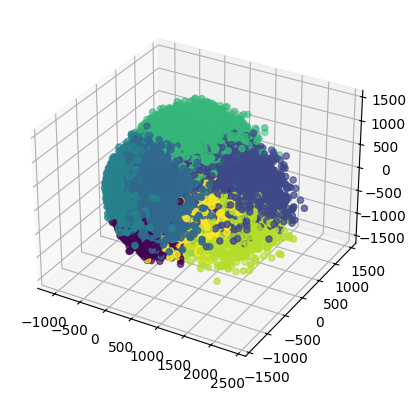

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(X_vis[:,0], X_vis[:,1], X_vis[:,2], zdir='z', c=y_pred)

You may notice we didn't quite evaluate our model. For the purposes of this exercise, we want purely to illustrate how a clustering algorithm works. Look into sklearn's metrics to evaluate the KMeans model yourself!